# Dataset Information

   Dream Housing Finance (DHF) company deals in home loans. They have presence across all urban, semi urban and rural areas. So far, DHF employees manually accepted or denied loan applications based on their professional experience, given the details provided by the applicants.
   
   Now the management wants to implement an automated solution. Applicants should be able to provide their details on the company website and the program directly tells them if their loan request is accepted or not. The software should be trained by using the advisors' experience to mimic the current process as good as possible. For this reason, all past applications and the approvement status are given as data points.
   
   
   This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv("LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset
There are missing values in the data sets that have to be cleaned before applying any models:
- Clean all missing values

In [5]:
# find the null values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the missing values for numerical terms
# use the mean of all given values



In [7]:
# fill the missing values for categorical terms
# use the mode of all given values

In [9]:
# check if there are any null values left


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis
- If you want, explore the data with some plots

<AxesSubplot:xlabel='Gender', ylabel='count'>

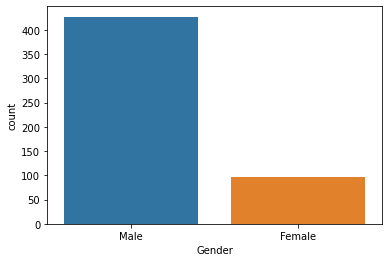

In [10]:
# categorical attributes visualization
# Gender

<AxesSubplot:xlabel='Married', ylabel='count'>

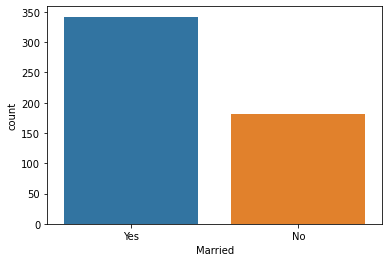

In [11]:
# Married

<AxesSubplot:xlabel='Dependents', ylabel='count'>

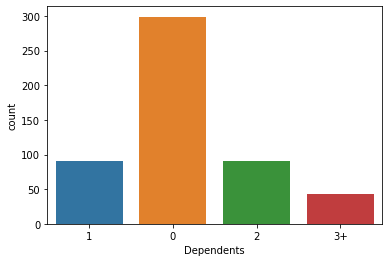

In [12]:
# Dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

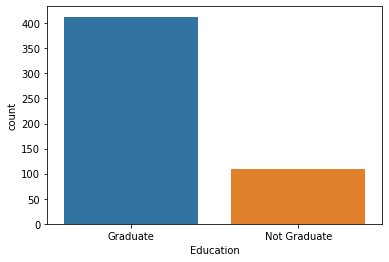

In [13]:
# Education

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

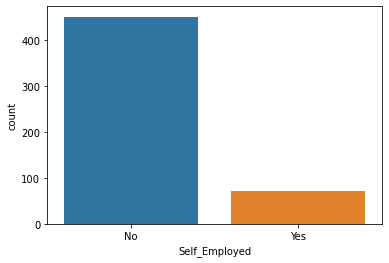

In [14]:
# Self Employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

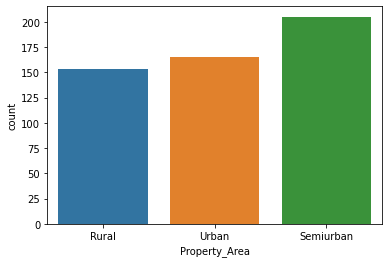

In [15]:
# Property Area

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

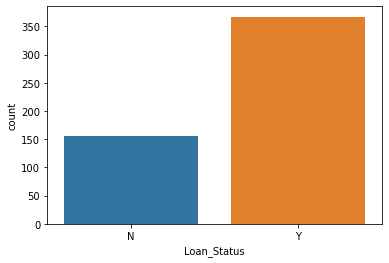

In [16]:
# Loan Status

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

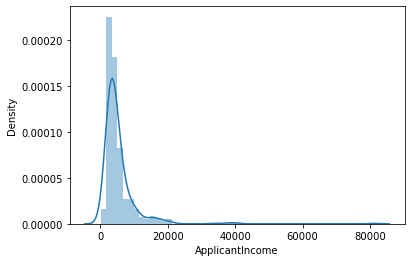

In [17]:
# numerical attributes visualization
# Applicant Income

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

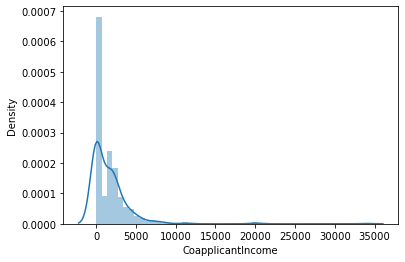

In [18]:
# Coapplicant Income

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

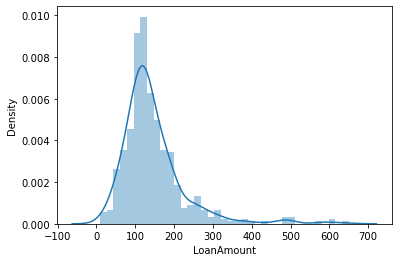

In [19]:
# Loan Amount

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

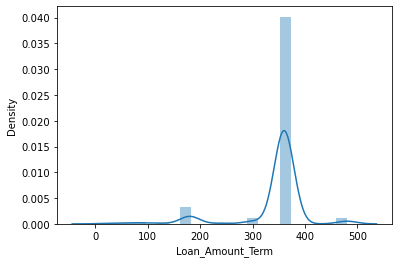

In [20]:
# Loan Amount Term

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

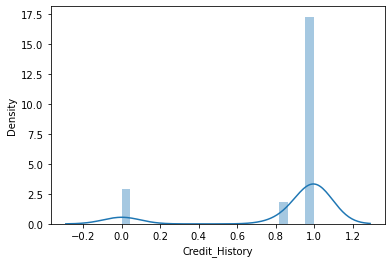

In [21]:
# Credit History

## Creation of new attributes
Sometimes variables have the same meaning/effect and can be summarized or we can simply create other variables that could be meaningful for the model:
- If necessary, summarize or create new variables

In [22]:
# create new variable: total income


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


## Label Encoding
Most of the time, the ML algorithm functions can only use numeric values. Currently there are still some columns with string or object data:
- Encode all non-numeric variables to numeric ones

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# encode non-numeric variables to numeric ones


In [25]:
# see the results
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
519,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0
520,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0
521,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0


## Coorelation Matrix
Using strongly correlated variables can disturb the model. It then might make sense to exclude some data points:
- Review the correlation matrix
- If necessary, remove a variable from the highly correlated pairs
- Remove all other variables that you do not deem as useful for the prediction

<AxesSubplot:>

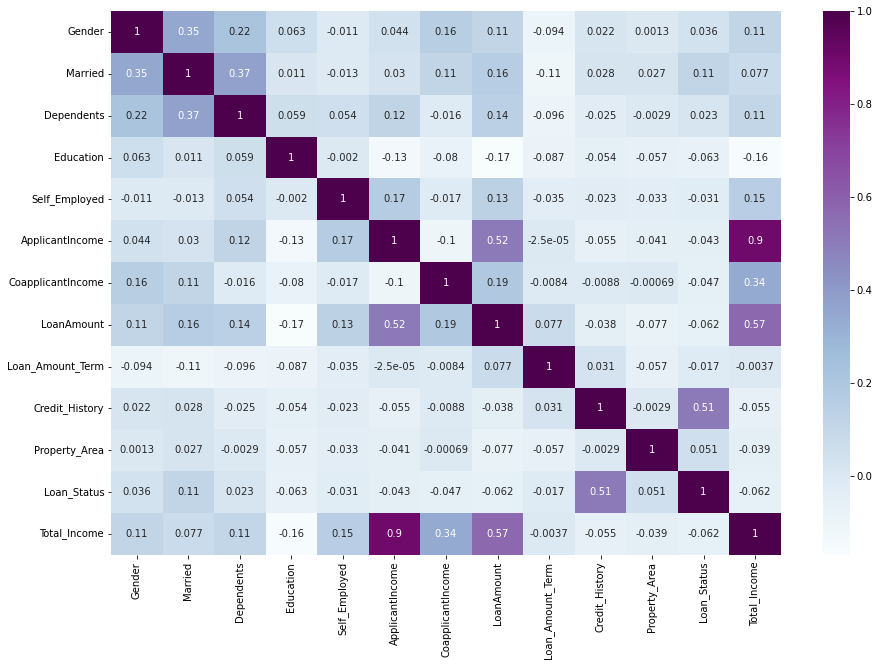

In [26]:
# plot a beautiful correlation matrix


In [1]:
# drop unnecessary columns


## Train-Test Split
- Split the data into a training and testing set (70/30)
- Prepare X and Y to fit the models

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# specify input and output attributes


In [30]:
# split data with train_test_split


## Model Training
Let's try multiple different ML methods to predict (classify) if a loan is accepted or not:
- Fit different models (LogisticRegression, DecisionTree, RandomForest, ExtraTrees)
- Validate the accuracy of the models (+ cross-validate)
- Find the best model

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [32]:
# classify function for printig scores
def classify(model, x, y):
    

In [33]:
# Logistic Regression


Accuracy is 80.1526717557252
Cross validation is 80.12087912087912


In [34]:
# Decision Tree


Accuracy is 72.51908396946564
Cross validation is 70.57326007326009


In [35]:
# Random Forest


Accuracy is 78.62595419847328
Cross validation is 77.26007326007324


In [36]:
# Extra Trees


Accuracy is 73.2824427480916
Cross validation is 74.38461538461539


## Hyperparameter tuning
So far we only used the default specifications of the models. Sometimes these are not a good fit for the analysis:
- Adjust the parameters of the RandomForest model to increase the accuracy

In [37]:
# Random Forest with adjusted parameters


Accuracy is 80.1526717557252
Cross validation is 79.93223443223444


## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
- Construct and plot a confusion matrix for your chosen model

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
# fit the model


RandomForestClassifier(max_depth=7, max_features=1, min_samples_split=25)

In [40]:
# predict test set and get the values of the confusion matrix


array([[15, 24],
       [ 3, 89]])

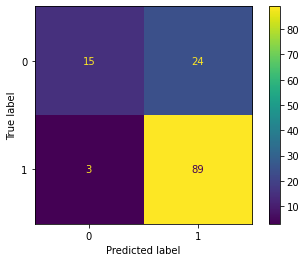

In [41]:
# plot a beautiful confusion matrix